In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
print("Libraries loaded successfully!")

Libraries loaded successfully!


In [15]:
df = pd.read_csv('../datasets/lifestyle_health.csv')

print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
df.head()

Dataset Shape: (10000, 11)

First 5 rows:


,Physical_Activity,Nutrition_Score,Stress_Level,Mindfulness,Sleep_Hours,Hydration,BMI,Alcohol,Smoking,Overall_Health_Score,Health_Status
0,54.934283,5.643011,5.696572,0.000000,6.292214,2.578565,24.275932,4.280610,8.984006,36.950187,Poor
1,42.234714,6.389001,5.566647,4.450144,8.519054,2.448713,25.970141,7.461846,3.223304,55.167774,Average
2,57.953771,5.805238,3.126960,9.129716,6.702720,3.261433,25.193857,0.000000,4.600482,78.304426,Good
3,75.460597,7.220836,6.159168,16.496689,7.135854,3.726265,19.527300,9.958423,3.947706,94.018274,Good
4,40.316933,9.394357,2.019835,25.241623,8.076086,3.049478,23.348229,4.320347,8.084322,100.000000,Good


In [16]:
print("Dataset Info:")
df.info()
print("Column Names:")
print(df.columns.tolist())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Physical_Activity     10000 non-null  float64
 1   Nutrition_Score       10000 non-null  float64
 2   Stress_Level          10000 non-null  float64
 3   Mindfulness           10000 non-null  float64
 4   Sleep_Hours           10000 non-null  float64
 5   Hydration             10000 non-null  float64
 6   BMI                   10000 non-null  float64
 7   Alcohol               10000 non-null  float64
 8   Smoking               10000 non-null  float64
 9   Overall_Health_Score  10000 non-null  float64
 10  Health_Status         10000 non-null  object 
dtypes: float64(10), object(1)
memory usage: 859.5+ KB
Column Names:
['Physical_Activity', 'Nutrition_Score', 'Stress_Level', 'Mindfulness', 'Sleep_Hours', 'Hydration', 'BMI', 'Alcohol', 'Smoking', 'Overall_Health_S

In [17]:
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing_Count': missing,
    'Percentage': missing_pct
})

missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Percentage', ascending=False)

if len(missing_df) > 0:
    print("Missing Values Found:")
    print(missing_df)
else:
    print("No missing values! Data is clean.")

No missing values! Data is clean.


In [18]:
print("Statistical Summary:")
df.describe()

Statistical Summary:


,Physical_Activity,Nutrition_Score,Stress_Level,Mindfulness,Sleep_Hours,Hydration,BMI,Alcohol,Smoking,Overall_Health_Score
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,45.047069,6.966599,4.987202,15.224636,7.000194,2.503302,24.095086,3.523663,5.706911,78.227945
std,19.832871,1.883295,1.938195,9.454891,1.468580,0.801660,3.356663,3.270784,5.000260,19.697853
min,0.000000,0.000000,1.000000,0.000000,3.000000,0.500000,18.000000,0.000000,0.000000,2.217088
25%,31.548189,5.675978,3.599696,8.053871,6.003898,1.958461,21.653393,0.298894,1.065818,64.627060
50%,44.948100,7.031693,4.988464,14.896178,7.014341,2.506579,24.072122,2.980658,4.954994,81.118118
75%,58.421618,8.387730,6.327795,21.790305,8.025752,3.052666,26.380536,5.706382,8.991626,97.972163
max,120.000000,10.000000,10.000000,52.278333,10.000000,5.000000,36.376168,18.040621,27.978693,100.000000


Target Variable: Overall_Health_Score

Statistics:
count    10000.000000
mean        78.227945
std         19.697853
min          2.217088
25%         64.627060
50%         81.118118
75%         97.972163
max        100.000000
Name: Overall_Health_Score, dtype: float64

Value Range:
Min: 2.217087578362805
Max: 100.0
Mean: 78.23
Median: 81.12


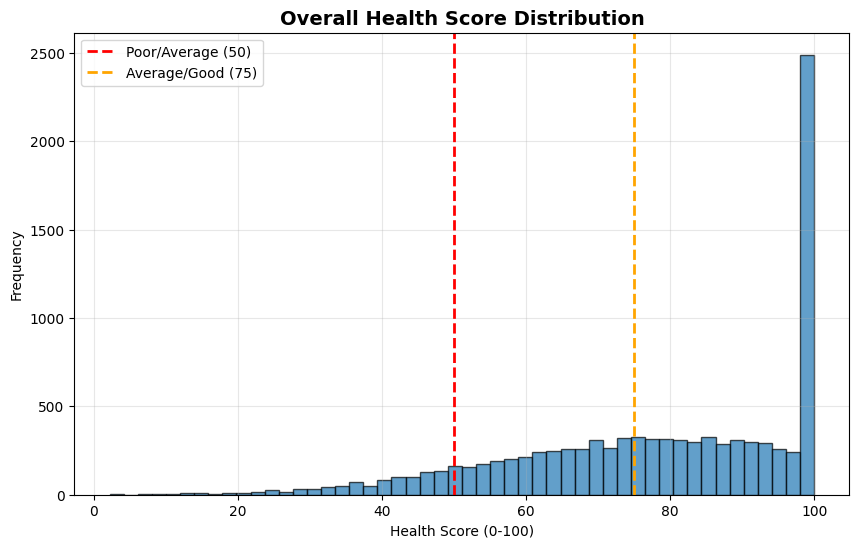

In [19]:
target_col = 'Overall_Health_Score'

print(f"Target Variable: {target_col}")
print("\nStatistics:")
print(df[target_col].describe())

print("\nValue Range:")
print(f"Min: {df[target_col].min()}")
print(f"Max: {df[target_col].max()}")
print(f"Mean: {df[target_col].mean():.2f}")
print(f"Median: {df[target_col].median():.2f}")

plt.figure(figsize=(10, 6))
plt.hist(df[target_col], bins=50, edgecolor='black', alpha=0.7)
plt.axvline(50, color='red', linestyle='--', linewidth=2, label='Poor/Average (50)')
plt.axvline(75, color='orange', linestyle='--', linewidth=2, label='Average/Good (75)')
plt.title('Overall Health Score Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Health Score (0-100)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

Target Distribution:
Health_Status
Good       6759
Average    2823
Poor        418
Name: count, dtype: int64


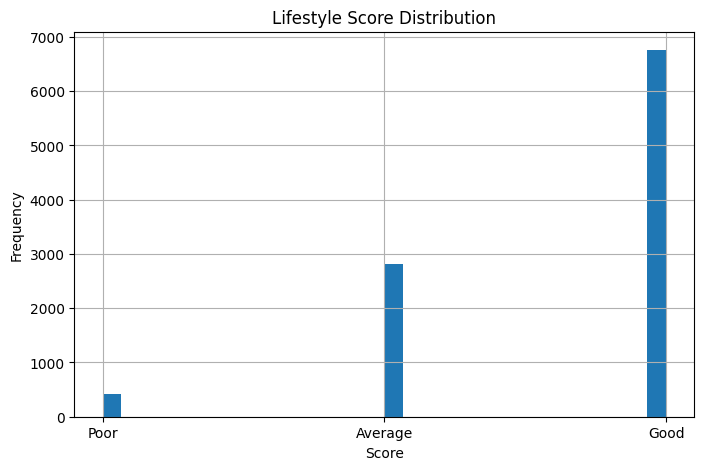

In [10]:
# Check if target column exists - adjust name based on dataset
target_col = 'Health_Status'  # Ya jo bhi actual column name ho

if target_col in df.columns:
    print("Target Distribution:")
    print(df[target_col].value_counts())
    
    plt.figure(figsize=(8, 5))
    df[target_col].hist(bins=30)
    plt.title('Lifestyle Score Distribution')
    plt.xlabel('Score')
    plt.ylabel('Frequency')
    plt.show()
else:
    print("Target column not found. Available columns:", df.columns.tolist())

Health Status Distribution:
Health_Status
Good       6759
Average    2823
Poor        418
Name: count, dtype: int64

Percentage:
Health_Status
Good       67.59
Average    28.23
Poor        4.18
Name: proportion, dtype: float64


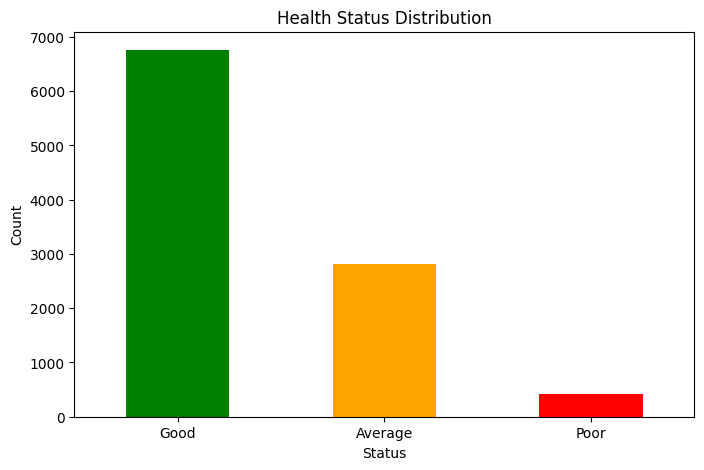

In [20]:
print("Health Status Distribution:")
print(df['Health_Status'].value_counts())
print("\nPercentage:")
print(df['Health_Status'].value_counts(normalize=True) * 100)

plt.figure(figsize=(8, 5))
df['Health_Status'].value_counts().plot(kind='bar', color=['green', 'orange', 'red'])
plt.title('Health Status Distribution')
plt.xlabel('Status')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

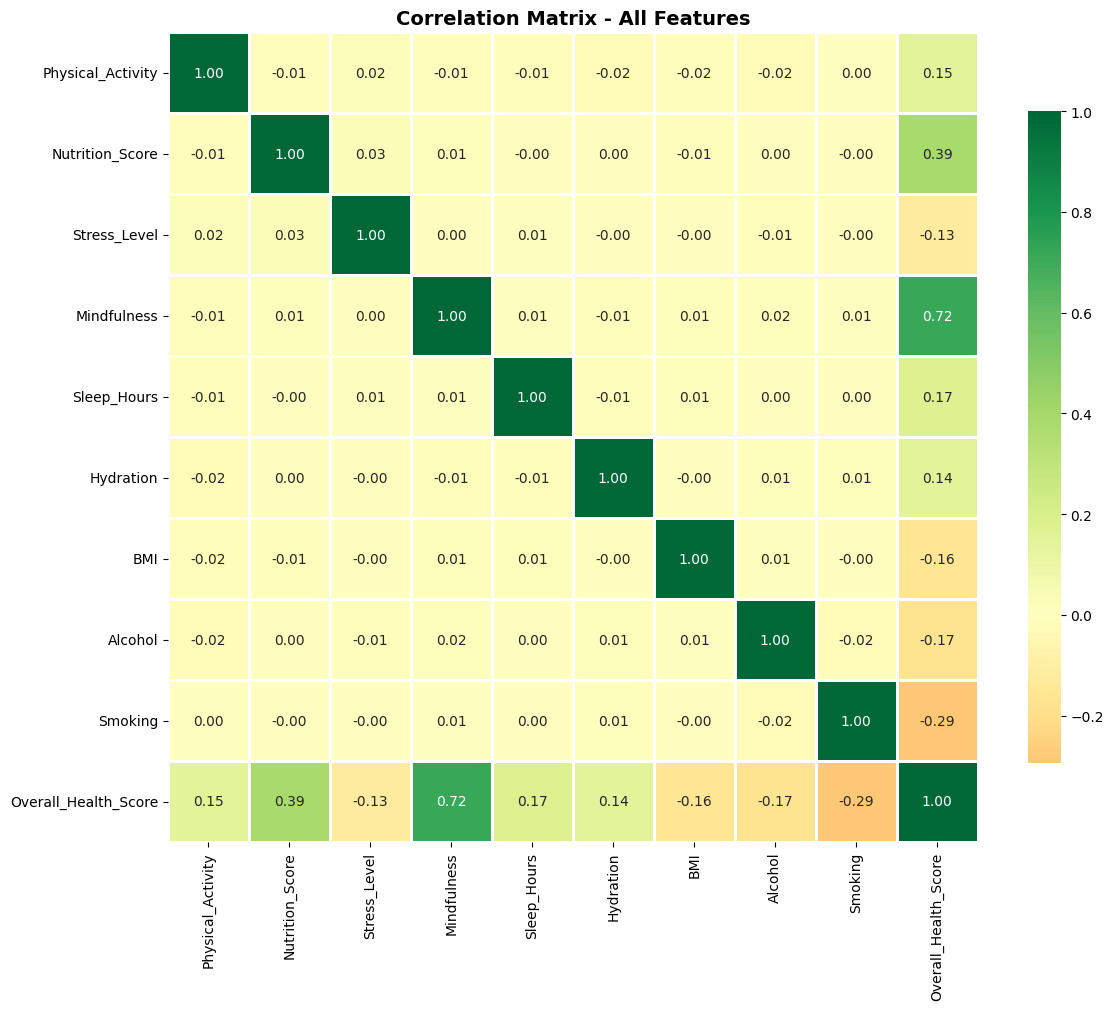

In [23]:
correlation = df[numerical_cols + ['Overall_Health_Score']].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='RdYlGn', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix - All Features', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

Correlation with Overall Health Score:
Overall_Health_Score    1.000000
Mindfulness             0.715856
Nutrition_Score         0.385678
Sleep_Hours             0.171856
Physical_Activity       0.146014
Hydration               0.142044
Stress_Level           -0.129315
BMI                    -0.160278
Alcohol                -0.174725
Smoking                -0.294431
Name: Overall_Health_Score, dtype: float64


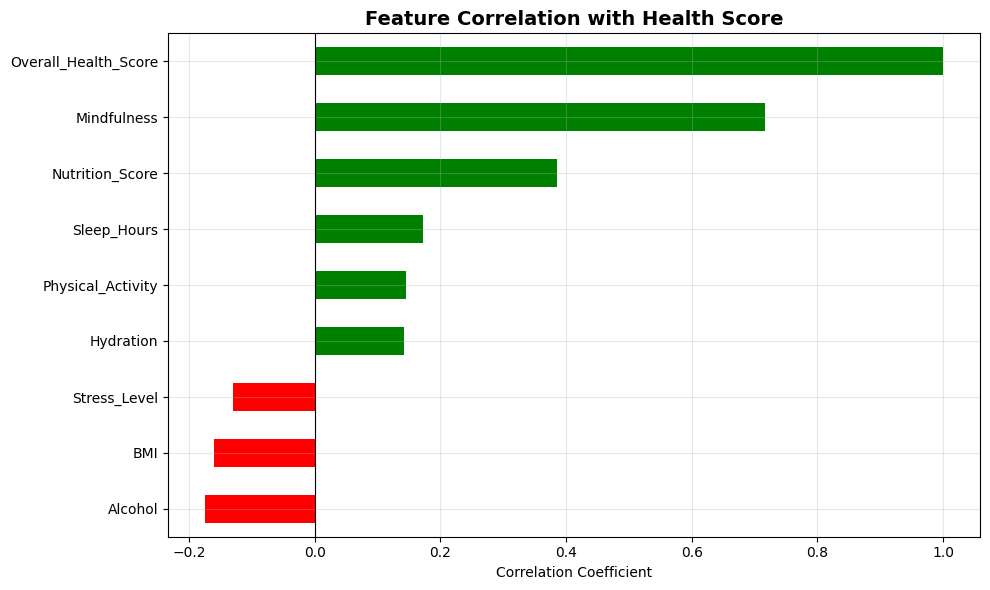

In [24]:
target_corr = correlation['Overall_Health_Score'].sort_values(ascending=False)

print("Correlation with Overall Health Score:")
print(target_corr)

plt.figure(figsize=(10, 6))
target_corr[:-1].sort_values().plot(kind='barh', color=['red' if x < 0 else 'green' for x in target_corr[:-1].sort_values()])
plt.title('Feature Correlation with Health Score', fontsize=14, fontweight='bold')
plt.xlabel('Correlation Coefficient')
plt.axvline(0, color='black', linewidth=0.8)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

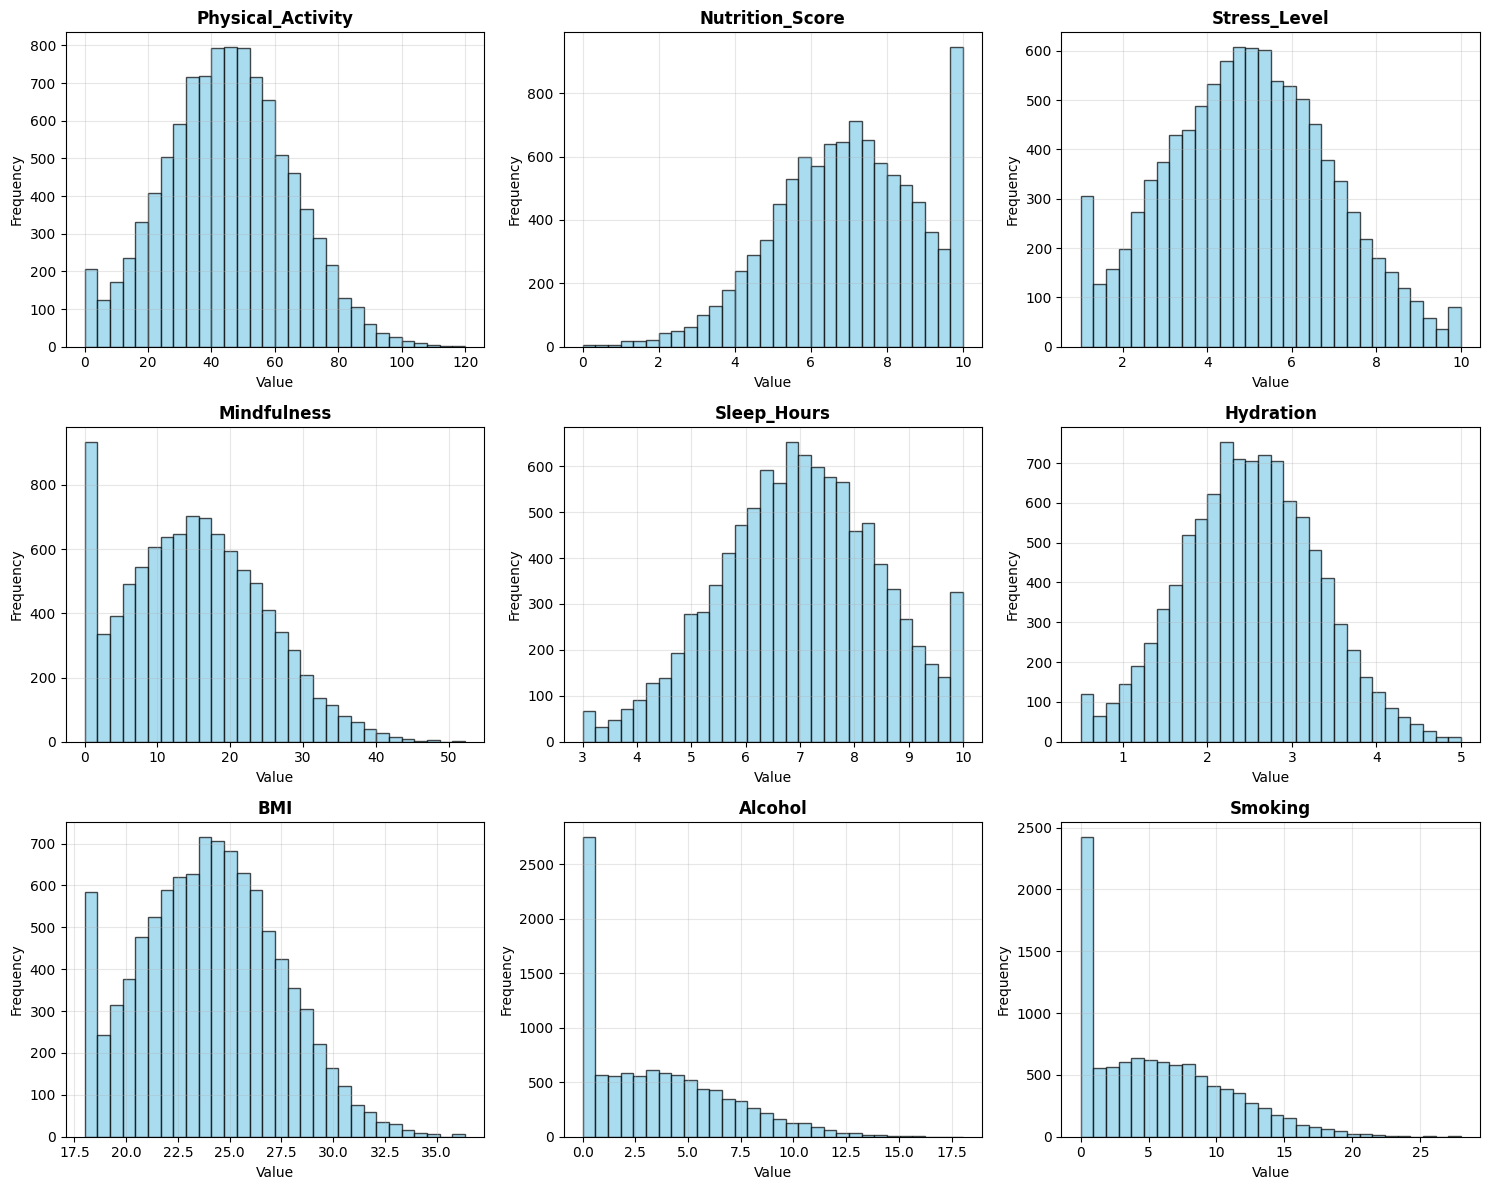

In [26]:
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    axes[i].hist(df[col], bins=30, edgecolor='black', alpha=0.7, color='skyblue')
    axes[i].set_title(col, fontweight='bold')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')
    axes[i].grid(alpha=0.3)

plt.tight_layout()
plt.show()

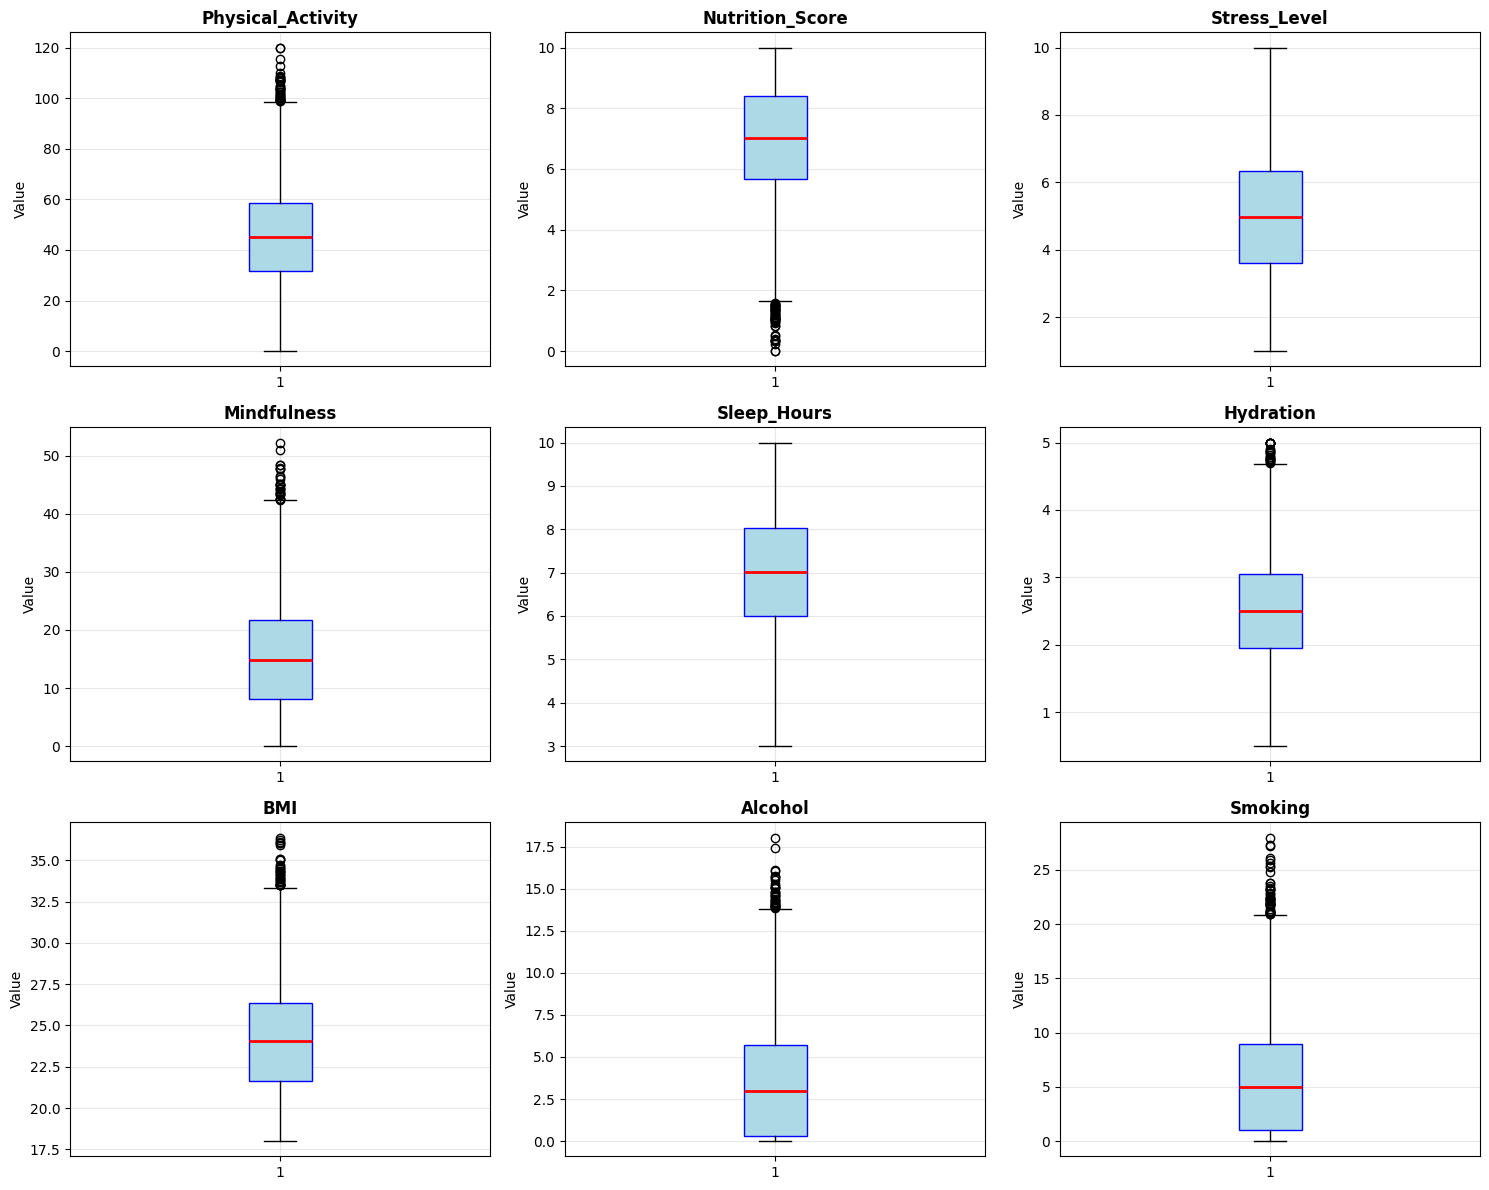

In [27]:
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    axes[i].boxplot(df[col], patch_artist=True, 
                    boxprops=dict(facecolor='lightblue', color='blue'),
                    medianprops=dict(color='red', linewidth=2))
    axes[i].set_title(col, fontweight='bold')
    axes[i].set_ylabel('Value')
    axes[i].grid(alpha=0.3)

plt.tight_layout()
plt.show()

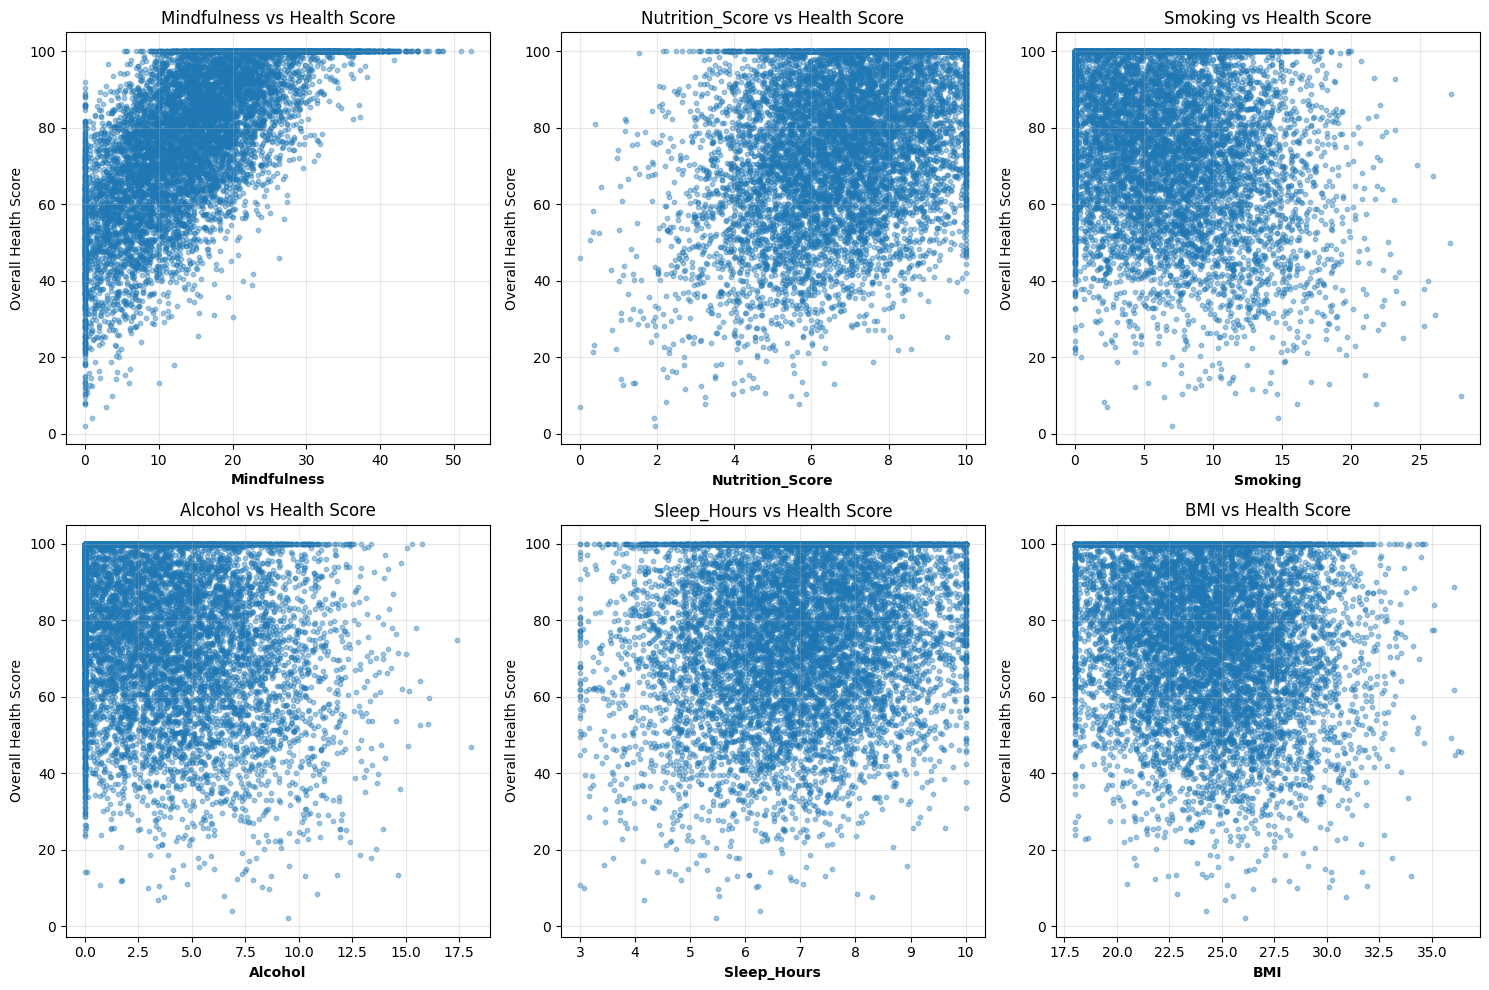

In [28]:
top_features = target_corr.abs().sort_values(ascending=False).head(7).index[1:]

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, feature in enumerate(top_features):
    axes[i].scatter(df[feature], df['Overall_Health_Score'], alpha=0.4, s=10)
    axes[i].set_xlabel(feature, fontweight='bold')
    axes[i].set_ylabel('Overall Health Score')
    axes[i].set_title(f'{feature} vs Health Score')
    axes[i].grid(alpha=0.3)

plt.tight_layout()
plt.show()

In [29]:
# High correlation between features can cause problems
feature_corr = correlation.drop('Overall_Health_Score', axis=0).drop('Overall_Health_Score', axis=1)

high_corr = []
for i in range(len(feature_corr.columns)):
    for j in range(i+1, len(feature_corr.columns)):
        if abs(feature_corr.iloc[i, j]) > 0.7:
            high_corr.append((feature_corr.columns[i], feature_corr.columns[j], feature_corr.iloc[i, j]))

if high_corr:
    print("High Correlation Pairs (>0.7):")
    for pair in high_corr:
        print(f"{pair[0]} <-> {pair[1]}: {pair[2]:.3f}")
else:
    print("No high multicollinearity detected!")

No high multicollinearity detected!


In [30]:
print("FEATURE SELECTION ANALYSIS")

print("\n1. Correlation with Target (Overall_Health_Score):")
print(target_corr[:-1].sort_values(ascending=False))

print("\n2. RECOMMENDATION:")

# Weak correlations (can consider dropping if needed)
weak_features = target_corr[abs(target_corr) < 0.1].index.tolist()
if 'Overall_Health_Score' in weak_features:
    weak_features.remove('Overall_Health_Score')

if weak_features:
    print(f"Weak features (correlation < 0.1): {weak_features}")
    print("Consider dropping if model performance is poor.")
else:
    print("All features have decent correlation!")

print("\n3. FINAL FEATURE SET:")
final_features = [col for col in numerical_cols if col not in weak_features]
print(final_features)
print(f"\nTotal features to use: {len(final_features)}")

FEATURE SELECTION ANALYSIS

1. Correlation with Target (Overall_Health_Score):
Overall_Health_Score    1.000000
Mindfulness             0.715856
Nutrition_Score         0.385678
Sleep_Hours             0.171856
Physical_Activity       0.146014
Hydration               0.142044
Stress_Level           -0.129315
BMI                    -0.160278
Alcohol                -0.174725
Name: Overall_Health_Score, dtype: float64

2. RECOMMENDATION:
All features have decent correlation!

3. FINAL FEATURE SET:
['Physical_Activity', 'Nutrition_Score', 'Stress_Level', 'Mindfulness', 'Sleep_Hours', 'Hydration', 'BMI', 'Alcohol', 'Smoking']

Total features to use: 9


In [32]:

print("DATASET SUMMARY REPORT")


print(f"\n1. Dataset Size: {df.shape[0]} rows, {df.shape[1]} columns")
print(f"2. Missing Values: {df.isnull().sum().sum()}")
print(f"3. Target Variable: Overall_Health_Score (Range: {df['Overall_Health_Score'].min():.2f} - {df['Overall_Health_Score'].max():.2f})")
print(f"4. Total Features: {len(numerical_cols)}")

print("\n5. Top 3 Most Important Features:")
top_3 = target_corr.drop('Overall_Health_Score').head(3)
for i, (feat, corr) in enumerate(top_3.items(), 1):
    print(f"   {i}. {feat}: {corr:.3f}")

print("\n6. Recommended ML Models:")
print("   - XGBoost Regressor (Best for this dataset)")
print("   - Gradient Boosting Regressor")
print("   - Support Vector Regressor")

print("\n7. Data Quality:")
print("   ✓ No missing values - Data is clean!")
print("   ✓ All features have good correlation")
print("   ✓ No columns need to be dropped")
print("   ✓ Ready for model training!")

print("\n8. Next Step: Model Training with XGBoost")



DATASET SUMMARY REPORT

1. Dataset Size: 10000 rows, 11 columns
2. Missing Values: 0
3. Target Variable: Overall_Health_Score (Range: 2.22 - 100.00)
4. Total Features: 9

5. Top 3 Most Important Features:
   1. Mindfulness: 0.716
   2. Nutrition_Score: 0.386
   3. Sleep_Hours: 0.172

6. Recommended ML Models:
   - XGBoost Regressor (Best for this dataset)
   - Gradient Boosting Regressor
   - Support Vector Regressor

7. Data Quality:
   ✓ No missing values - Data is clean!
   ✓ All features have good correlation
   ✓ No columns need to be dropped
   ✓ Ready for model training!

8. Next Step: Model Training with XGBoost
